In [1]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score
from sklearn.neighbors import LocalOutlierFactor
from sklearn.covariance import MinCovDet
from sklearn.feature_selection import f_classif
from scipy.stats import chi2
from sklearn.svm import OneClassSVM
from sklearn.linear_model import SGDOneClassSVM

In [2]:
#read in data 
df = pd.read_csv("creditcard.csv")

y = df.pop("Class")

In [3]:
#observe counts
y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [4]:
#observe NAs
print(f"target null count: {y.isna().sum()}")
print(f"feature null count: {df.isna().sum()}")

target null count: 0
feature null count: Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
dtype: int64


In [5]:
#observe data types
print(y.dtypes)
print(df.dtypes)

int64
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
dtype: object


In [6]:
#stratify train/test split 
x_train, x_test, y_train, y_test = train_test_split(df, y,stratify=y,test_size=0.2)

In [7]:
#EDA
x_train.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,...,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000
mean,94821.920095,0.001890,0.001126,0.002248,0.000102,-0.001174,0.001794,-0.000882,-0.001095,0.000165,...,0.001532,0.000112,0.000612,-0.000243,0.000556,-0.000127,-0.000284,0.000188,0.000437,88.338393
std,47487.452664,1.954292,1.648659,1.516109,1.416869,1.384607,1.335728,1.245948,1.200607,1.099318,...,0.772004,0.739567,0.726905,0.627577,0.605330,0.521962,0.481523,0.405369,0.331931,254.548808
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.320155,...,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000
25%,54213.000000,-0.918678,-0.596518,-0.889277,-0.848687,-0.693699,-0.767798,-0.554974,-0.207839,-0.643260,...,-0.211047,-0.228420,-0.542453,-0.161823,-0.354730,-0.317147,-0.326764,-0.070694,-0.052859,5.610000
50%,84710.000000,0.019541,0.065909,0.181031,-0.019874,-0.054428,-0.273360,0.039073,0.022522,-0.050574,...,-0.062161,-0.029428,0.007226,-0.011208,0.041224,0.016832,-0.051642,0.001496,0.011188,22.000000
75%,139332.000000,1.315791,0.802757,1.029141,0.743665,0.610326,0.399981,0.567949,0.327980,0.596212,...,0.133774,0.186347,0.530461,0.147773,0.439682,0.350466,0.239965,0.091124,0.078125,77.050000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.463246,31.612198,33.847808,25691.160000


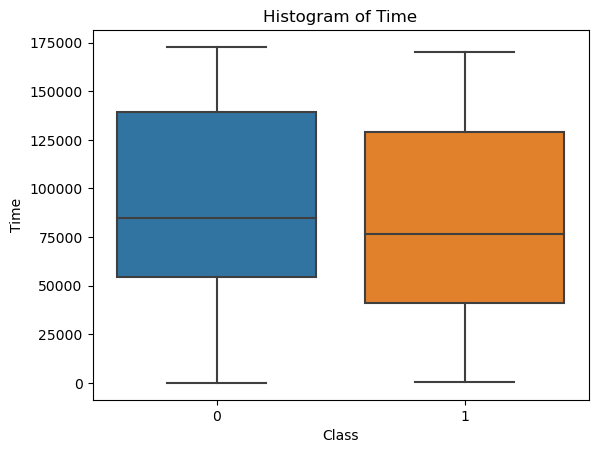

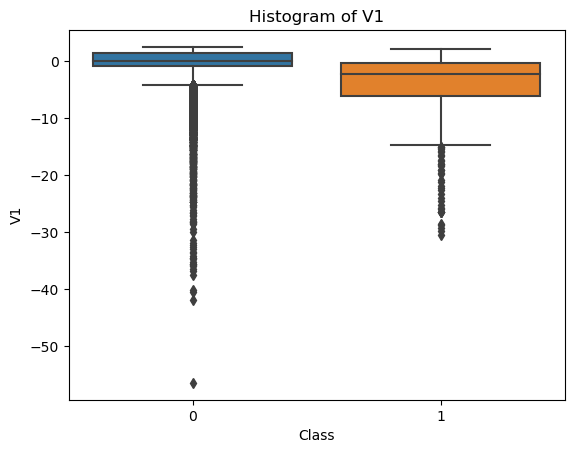

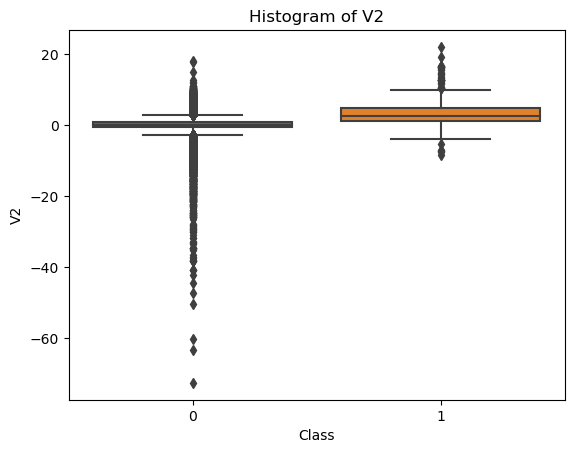

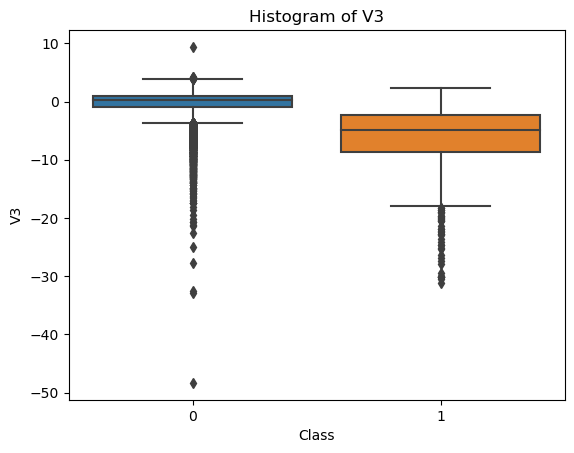

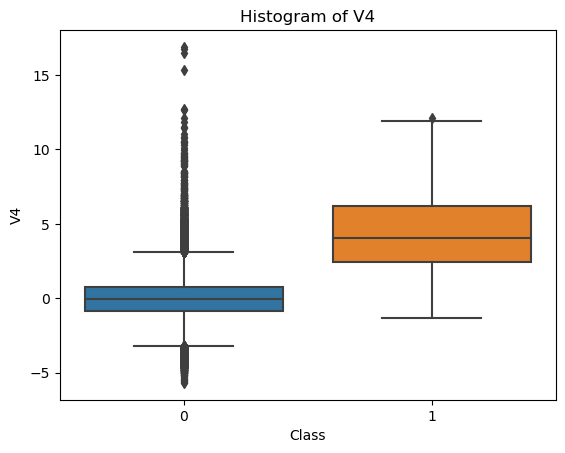

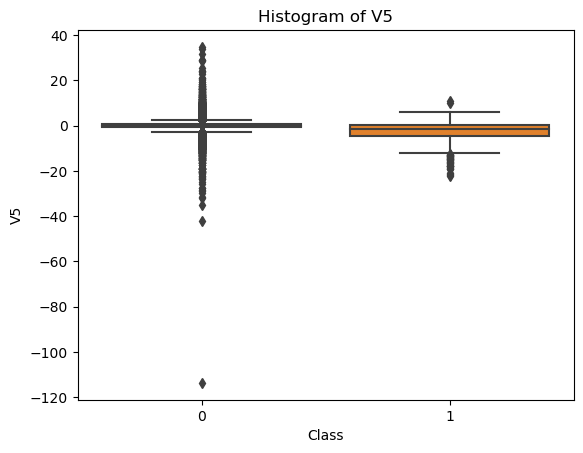

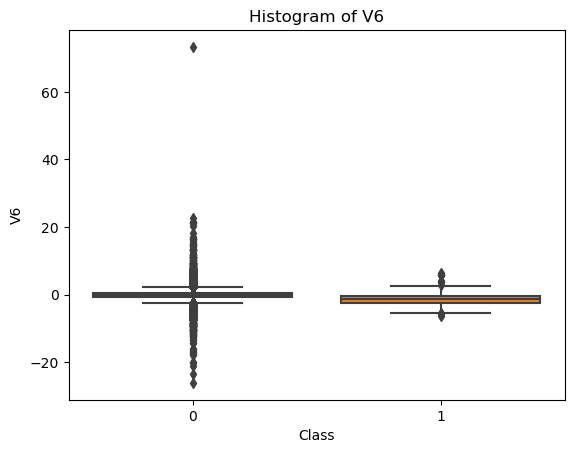

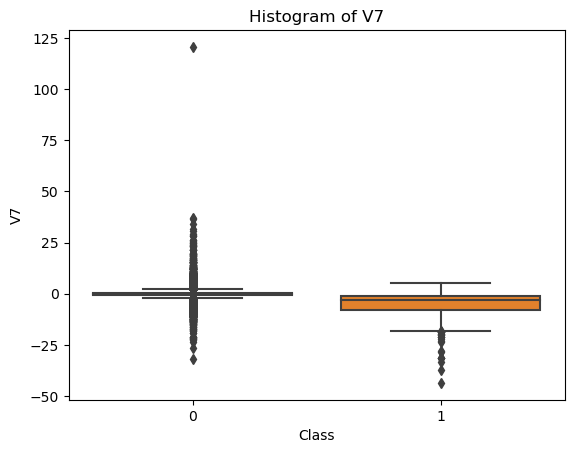

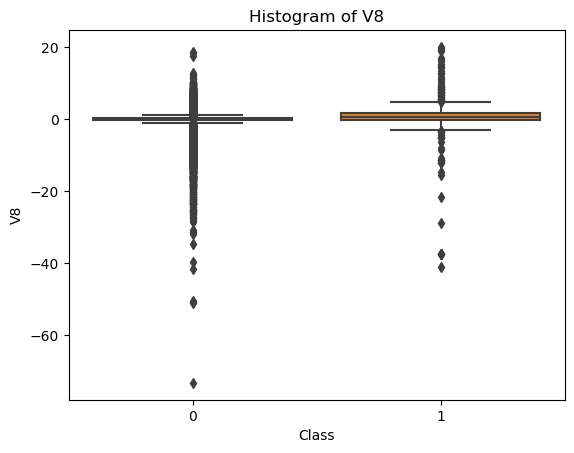

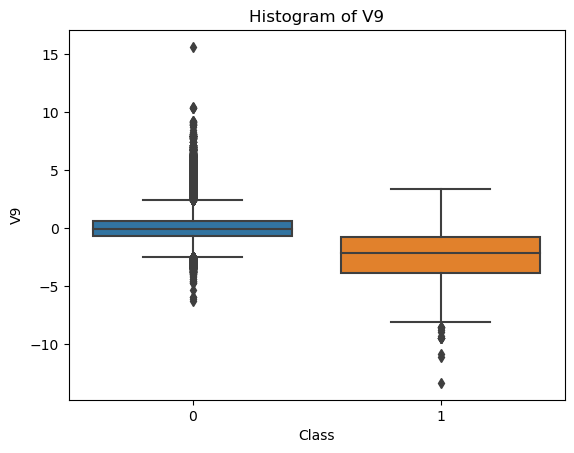

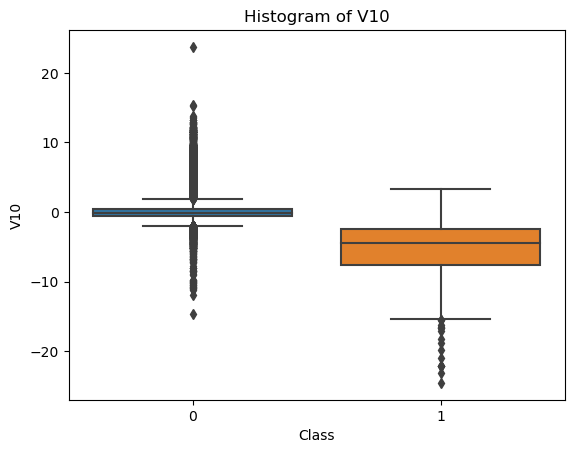

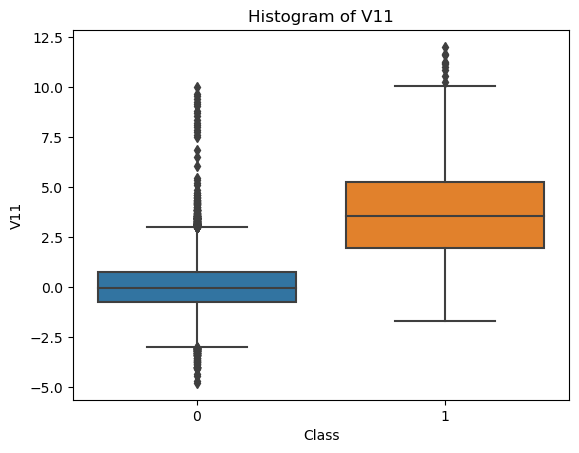

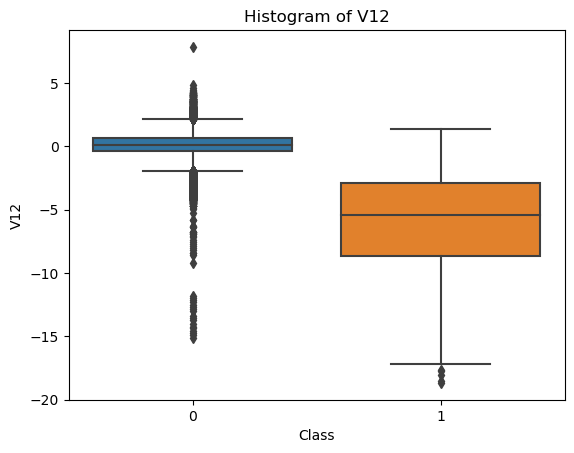

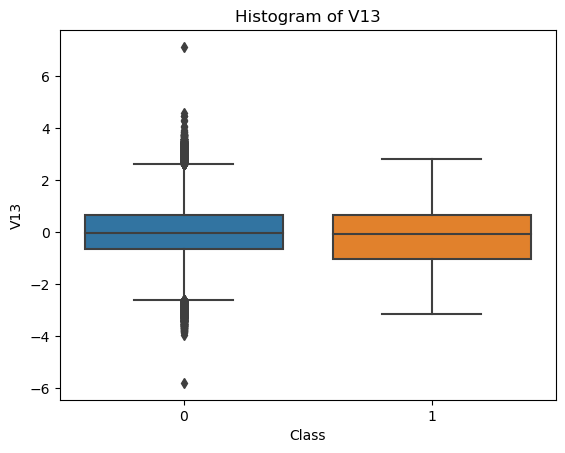

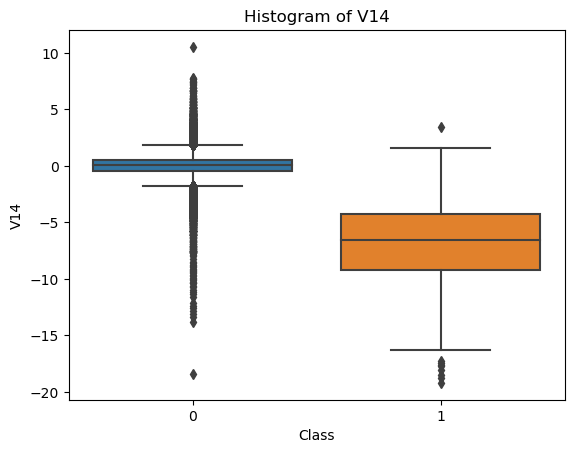

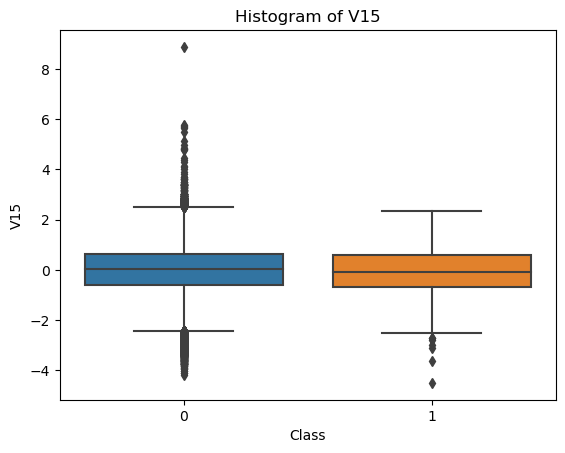

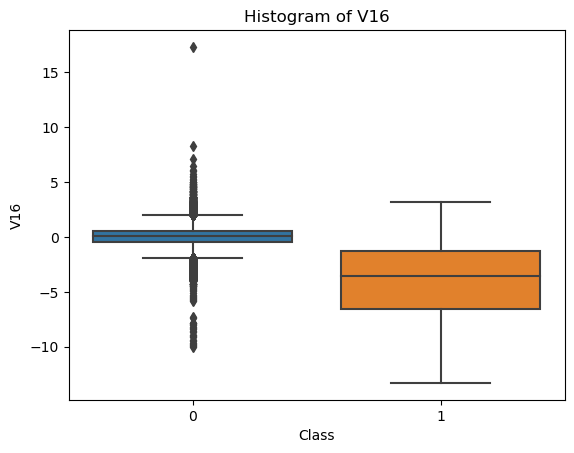

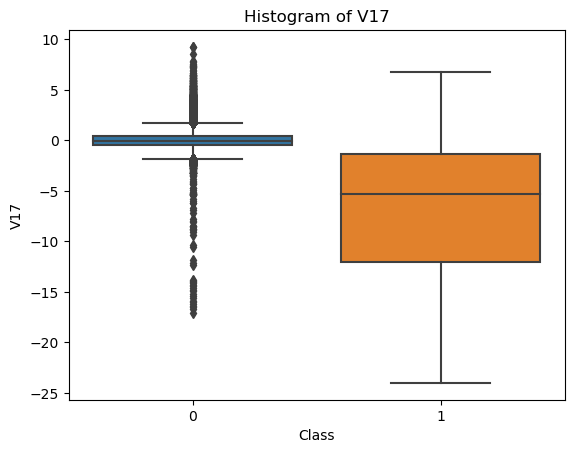

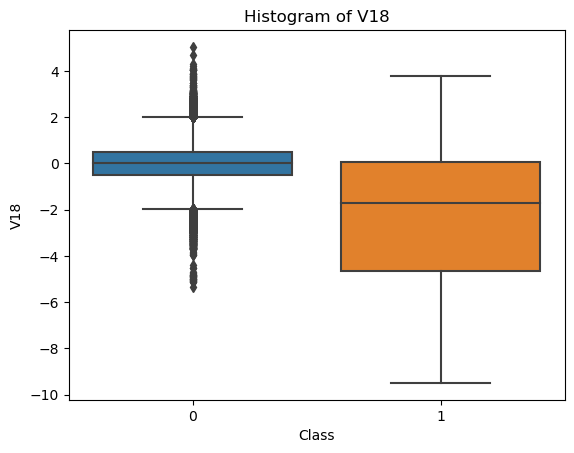

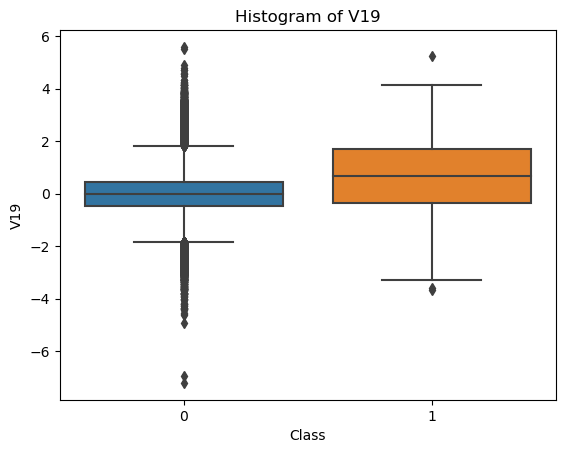

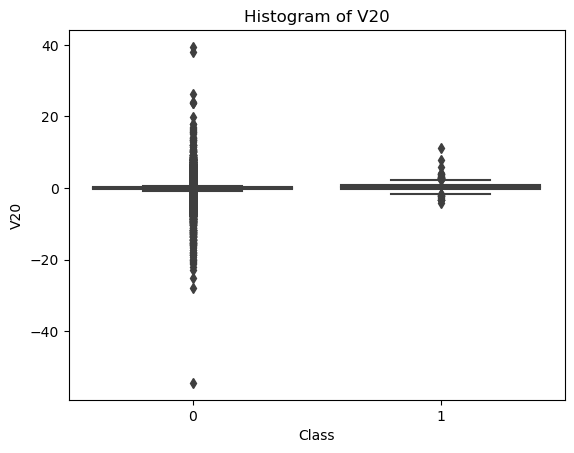

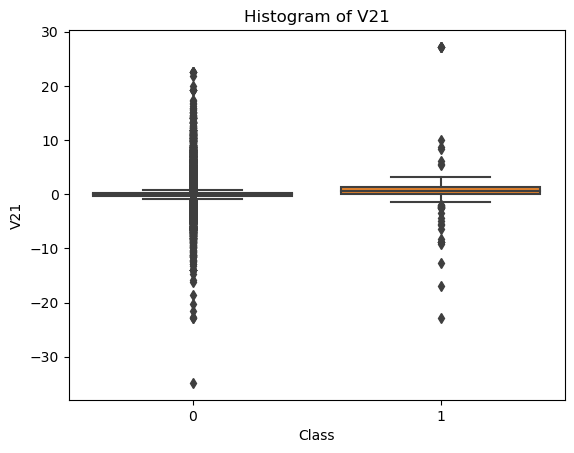

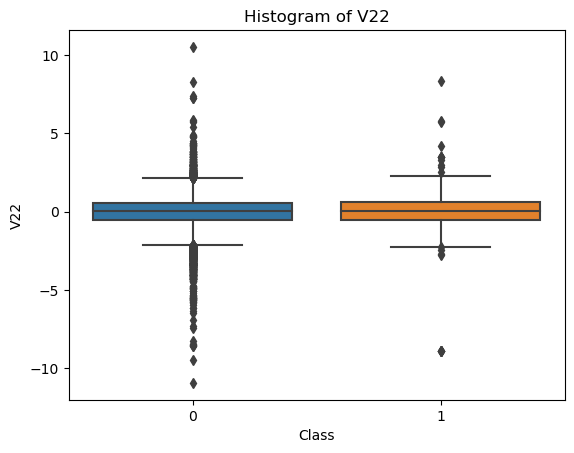

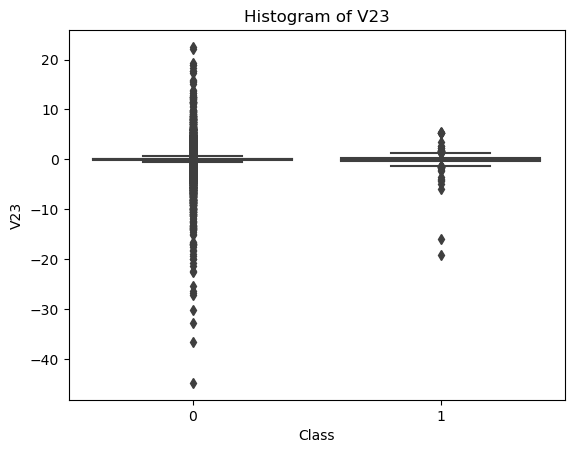

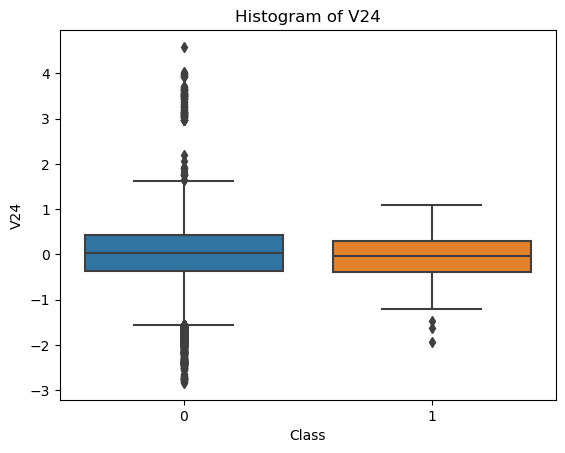

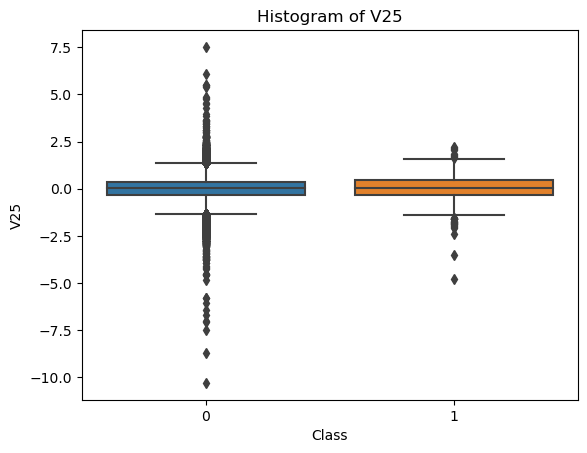

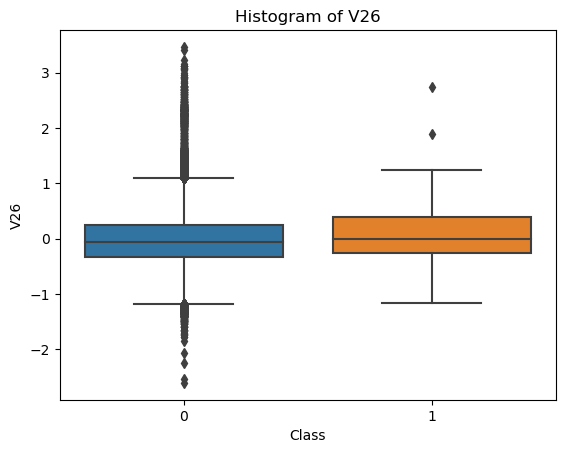

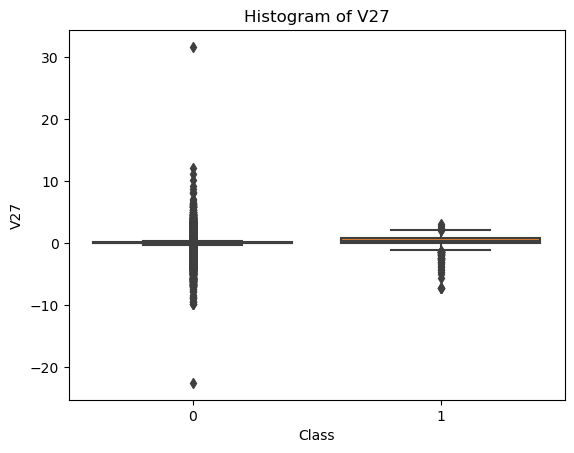

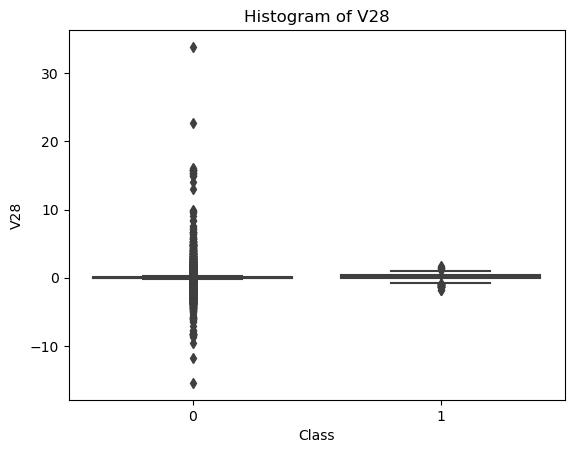

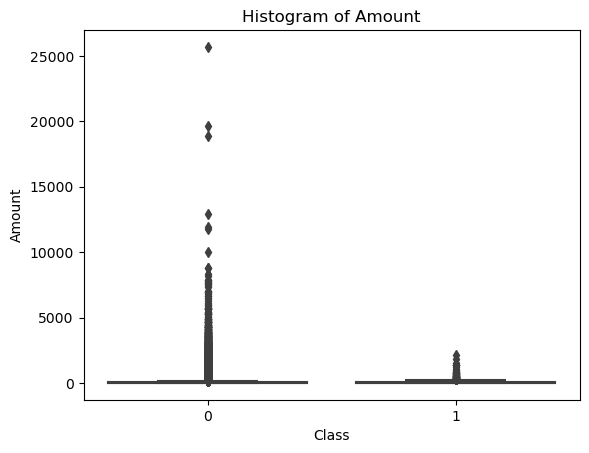

In [8]:
cols = x_train.columns.to_list()

cols.append("Class")

df_joined= pd.concat([x_train, y_train], axis = 1,ignore_index=True)

df_joined.columns = cols


for feature in df_joined.columns[:-1]:
        plt.figure()
        sns.boxplot(data=df_joined, x="Class", y=feature)
        plt.ylabel(feature)
        plt.title(f'Histogram of {feature}')
        plt.show()

In [9]:
#standardize/scale,impute

scaler = StandardScaler().set_output(transform="pandas")

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

print(y_train.value_counts())

0    227451
1       394
Name: Class, dtype: int64


In [12]:
#reduce the number of features to improve training and accuracy of anamloy detection models 

scores = dict()

f_statistic, p_values = f_classif(x_train_scaled, y_train)

for col in range(len(x_train_scaled.columns)):
    scores[x_train_scaled.columns.to_list()[col]] = f_statistic[col]

scores = sorted(scores.items(), key=lambda item: item[1], reverse=True)

corr_features = list(dict(scores).keys())[:7]

print(corr_features)

['V17', 'V14', 'V12', 'V10', 'V16', 'V3', 'V7']


In [13]:
#visualize desnity of outliers within every feature 
#sns.pairplot(df_joined, hue ='Class')


In [14]:
#isolation forest

#contamination - percent threshold for determining outliers

y_train_converted = y_train

#convert classes to match output of Isolation Forest
y_train_converted[y_train_converted == 1] = -1
y_train_converted[y_train_converted == 0] = 1

skf = StratifiedKFold(n_splits=2)
param_grid = {'n_estimators':[40,80,100], 'max_features':[.2,.4], 'contamination':[.001, .01], "max_samples":[.6,.8]}
model =  IsolationForest()
#clf = GridSearchCV(model, param_grid=param_grid,  scoring=scorer, cv=skf)
clf = GridSearchCV(model, param_grid=param_grid,  scoring="f1", cv=skf)

clf.fit(x_train_scaled[corr_features], y_train_converted)
print(clf.best_params_)

{'contamination': 0.001, 'max_features': 0.2, 'max_samples': 0.6, 'n_estimators': 80}


In [15]:
#fit final estimator with optimized parameters

y_test_converted = y_test

y_test_converted[y_test_converted == 1] = -1
y_test_converted[y_test_converted == 0] = 1


model = IsolationForest(contamination=.001,max_features=2,n_estimators=80, max_samples=.6)

model.fit(x_train_scaled[corr_features])

y_preds = model.predict(x_test_scaled[corr_features]) 

print("Precision: ",precision_score(y_test_converted,y_preds)) 
print("Recall: ",recall_score(y_test_converted,y_preds))

#If we want our algo to create more flags for potential freuds we can
#increase the contamination when training

Precision:  0.9990157999261849
Recall:  0.9996306978052898


In [16]:
#check results

result = np.vstack((y_test_converted, y_preds))

print(result[0][np.where(result[0] != result[1])[0]])
print(result[1][np.where(result[0] != result[1])[0]])


[-1 -1 -1  1 -1 -1  1  1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1  1  1
 -1 -1 -1 -1  1  1 -1 -1 -1 -1  1 -1 -1  1 -1 -1  1  1  1 -1 -1 -1 -1 -1
 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1
 -1 -1  1 -1 -1]
[ 1  1  1 -1  1  1 -1 -1  1  1  1  1  1 -1  1  1  1  1 -1  1  1  1 -1 -1
  1  1  1  1 -1 -1  1  1  1  1 -1  1  1 -1  1  1 -1 -1 -1  1  1  1  1  1
  1 -1 -1  1  1  1  1  1  1  1  1 -1 -1  1  1 -1  1  1  1  1 -1  1  1  1
  1  1 -1  1  1]


In [17]:
#decision_function - average anamoly score of an individual sample- anamolies will be close to 1 normal instances close to 0

#creating scores for random individual samples
decision_boundary = model.decision_function(x_test_scaled[corr_features].iloc[5,:].values.reshape(1,-1))
sample_boundary = model.score_samples(x_test_scaled[corr_features].iloc[5,:].values.reshape(1,-1))

print(model.predict(x_test_scaled[corr_features].iloc[5,:].values.reshape(1,-1)))
print(y_test.iloc[5])
print(decision_boundary)
print(sample_boundary)

#correctly predicted although this sample is slightly anomalous given its average depth compared to entire trees ie decision function
#and depth compared to average depth of an entire tree ie score sample

[1]
1
[0.25226208]
[-0.38487305]


C:\Users\egrah\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\egrah\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\egrah\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


#feature importance - retrain a vanilla random forest with output of anamoly model and compute mean decrease in impurity 
from sklearn.ensemble import GradientBoostingClassifier


clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0).fit(x_test, y_preds)

importance = pd.DataFrame(clf.feature_importances_, index=x_test.columns.to_list(), columns=["mdi"])

importance = importance.sort_values("mdi", ascending=False)

importance.head(30).plot.barh().set(title="MDI Feature Importance", xlabel="Importance", ylabel="Feature")



In [18]:
#local outlier factor 
skf = StratifiedKFold(n_splits=2)

param_grid = {'n_neighbors':[10,20,30], "contamination":[.001,.01]}
model =  LocalOutlierFactor(novelty=True)
clf = GridSearchCV(model, param_grid=param_grid, scoring="f1", cv=skf)

clf.fit(x_train_scaled[corr_features], y_train_converted)

print(clf.best_params_)

C:\Users\egrah\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
C:\Users\egrah\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
C:\Users\egrah\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
C:\Users\egrah\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
C:\Users\egrah\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
C:\Users\egrah\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X d

{'contamination': 0.001, 'n_neighbors': 30}


In [19]:
#set novelty to True to compare unseen testing data to model that used training data in Sklearn LOF
model = LocalOutlierFactor(n_neighbors=30, novelty=True, contamination=.001)

model.fit(x_train_scaled[corr_features])

y_preds = model.predict(x_test_scaled[corr_features])


print("Precision: ",precision_score(y_test_converted,y_preds)) 
print("Recall: ",recall_score(y_test_converted,y_preds))

C:\Users\egrah\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


Precision:  0.9982777104093074
Recall:  0.9989272650534609


In [20]:
#return indices and distances for a single sample
print(f"Distance of nearest neighbors and indices of nearest neighbors{model.kneighbors(X=x_test_scaled[corr_features].iloc[5,:].values.reshape(1,-1), n_neighbors=20, return_distance=True)}")

#larger values correspond to outliers
#model.negative_outlier_factor_

#small values correspond to outliers
decision_boundary = model.decision_function(x_test_scaled[corr_features].iloc[5,:].values.reshape(1,-1))
sample_boundary = model.score_samples(x_test_scaled[corr_features].iloc[5,:].values.reshape(1,-1))

#print(model.decision_function(x_test))

print(decision_boundary)
print(sample_boundary)

Distance of nearest neighbors and indices of nearest neighbors(array([[0.14572757, 0.16929763, 0.18855432, 0.20595936, 0.20826663,
        0.26284352, 0.3444114 , 0.35052488, 0.35887381, 0.36386557,
        0.38801761, 0.38829505, 0.40117184, 0.40437617, 0.40497763,
        0.4062079 , 0.41642732, 0.41656095, 0.41751055, 0.43406304]]), array([[112317, 182194, 111072,  53660, 199150,  78243, 199493, 150309,
        136612,  64664, 108221,  51142, 109114, 142143, 210137, 135030,
        126507, 145530,  79972,  35498]], dtype=int64))
[14204237.66187331]
[-1.08652826]


C:\Users\egrah\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
C:\Users\egrah\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
C:\Users\egrah\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


In [21]:
#create a robust covariance outlier detection function for numpy
def robust_covariance_outlier_detection(x_train, x_test, contamination=0.001):
    
    
    arr = x_train.to_numpy()
    #calculate covariance matrix between all features
    cov  = np.cov(arr , rowvar=False)

    #calculate inverse matrix
    cov_pm1 = np.linalg.matrix_power(cov, -1)
    #find centerpoint of each distirnution for every feature
    centerpoint = np.mean(arr , axis=0)


    distances = []

    arr_test = x_test.to_numpy()

    #calcualte mahalanobis for each data point
    for row, samp in enumerate(arr_test):
        p1 = samp - centerpoint
    
        distances.append(p1.T.dot(cov_pm1).dot(p1))
    
    distances = np.array(distances)

    
    #cutoff = chi2.ppf(0.95, arr.shape[1])
    #outlierIndexes = np.where(distances > cutoff )
    #print(outlierIndexes[0].shape)

    #instead of using chi squared to filter ourliers use contamination
    
    #create new array
    res = np.vstack((distances, y_test))

    #sort distances highest to lowest
    ind = np.argsort(res[0])[::-1]

    res = res[:,ind]

    #create new column to store predictions
    array = np.full(len(y_test),1)

    array = array.reshape(1, -1)

    res = np.concatenate((res, array), axis=0)
    res[2,:int(round(contamination*len(y_test),0))] = -1

    print("Precision: ",precision_score(res[1],res[2])) 
    print("Recall: ",recall_score(res[1],res[2]))
    


robust_covariance_outlier_detection(x_train[corr_features], x_test[corr_features])

Precision:  0.9989983305509182
Recall:  0.9997186268992684


#robust covariance

#i kept getting error messages that the dterminant of the covariant matrix was fluctuating, after reserach you can increase 
#the support fraction paramater to include a larger sdample in the covariance matrix calculation or as I read on a message 
#board, decrease the number of features used to calculate the covaraince matrix which worked in resolving the error message


def robust_covariance_outlier_detection(X, contamination=0.001):
    # Fit the MCD estimator
    mcd = MinCovDet().fit(X)

    # Compute the Mahalanobis distances
    #you have to multiply by the inverse not the covarance matrix itself!!!!!!!!!!!!!!!!!!!!!!!!!!
    mahal_dist = mcd.mahalanobis(X)

    # Determine the threshold for outliers
    threshold = chi2.ppf(1 - contamination, X.shape[1])

    # Identify outliers
    outliers = mahal_dist > threshold

    return outliers

outliers = robust_covariance_outlier_detection(x_train_scaled.iloc[:,:5])

y_preds = np.zeros(len(y_train))

y_preds[outliers] = 1

print("Precision: ",precision_score(y_train.to_numpy(),y_preds)) 
print("Recall: ",recall_score(y_train.to_numpy(),y_preds))

In [23]:
#one class svm


#Fit One Class SVM with Linear Kernel
param_grid={"kernel":["linear"], "nu":[.0001,.001,.01]}

model =  OneClassSVM()
clf = GridSearchCV(model, param_grid=param_grid,  scoring="f1", cv=skf)

clf.fit(x_train_scaled, y_train_converted)
print(clf.best_params_)

y_preds = clf.predict(x_test_scaled)


print("Precision: ",precision_score(y_test_converted,y_preds)) 
print("Recall: ",recall_score(y_test_converted,y_preds))

{'kernel': 'linear', 'nu': 0.0001}
Precision:  0.9937238493723849
Recall:  0.2505979178390546


In [ ]:
param_grid={"kernel":["poly"], "nu":[.0001,.001,.01], "degree":[2,3],"gamma":[1,5,10]}

model =  OneClassSVM()
clf = GridSearchCV(model, param_grid=param_grid,  scoring="f1", cv=skf)

clf.fit(x_train_scaled, y_train_converted)
print(clf.best_params_)

y_preds = clf.predict(x_test_scaled)

print("Precision: ",precision_score(y_test_converted,y_preds)) 
print("Recall: ",recall_score(y_test_converted,y_preds))

In [ ]:
param_grid={"kernel":["rbf"], "nu":[.0001,.001,.01],"gamma":[1,5,10]}

model =  OneClassSVM()
clf = GridSearchCV(model, param_grid=param_grid,  scoring="f1", cv=skf)

clf.fit(x_train_scaled, y_train_converted)
print(clf.best_params_)

y_preds = clf.predict(x_test_scaled)

print("Precision: ",precision_score(y_test_converted,y_preds)) 
print("Recall: ",recall_score(y_test_converted,y_preds))

In [ ]:
#one class svm with stochastic gradient descent 
param_grid={"nu":[.0001,.001,.01],}


model = linear_model.SGDOneClassSVM(random_state=42)

clf = GridSearchCV(model, param_grid=param_grid,  scoring="f1", cv=skf)

clf.fit(x_train_scaled, y_train_converted)
print(clf.best_params_)

clf.fit(x_train_scaled, y_train_converted)
print(clf.best_params_)

y_preds = clf.predict(x_test_scaled)

print("Precision: ",precision_score(y_test_converted,y_preds)) 
print("Recall: ",recall_score(y_test_converted,y_preds))